#### Importing the Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import _get_covariance,anova_lm
from warnings import filterwarnings
filterwarnings("ignore")

#### Problem Statement 1:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.



#### Loading the Dataset CSV file of Problem Statement 1.

In [24]:
df=pd.read_csv("Salary_Data.csv")

#### Checking the Records of the Dataset.

In [25]:
df

Education        Occupation  Salary
0    Doctorate      Adm-clerical  153197
1    Doctorate      Adm-clerical  115945
2    Doctorate      Adm-clerical  175935
3    Doctorate      Adm-clerical  220754
4    Doctorate             Sales  170769
5    Doctorate             Sales  219420
6    Doctorate             Sales  237920
7    Doctorate             Sales  160540
8    Doctorate             Sales  180934
9    Doctorate    Prof-specialty  248156
10   Doctorate    Prof-specialty  247724
11   Doctorate    Prof-specialty  249207
12   Doctorate    Prof-specialty  235334
13   Doctorate    Prof-specialty  248871
14   Doctorate    Prof-specialty  257345
15   Bachelors      Adm-clerical  160910
16   Bachelors      Adm-clerical  162494
17   Bachelors      Adm-clerical  188729
18   Bachelors    Prof-specialty   99185
19   Bachelors    Prof-specialty   90135
20   Bachelors    Prof-specialty  100135
21   Bachelors    Prof-specialty  133696
22   Bachelors             Sales  149909
23   Bachelors             Sales  191712
24   Bachelors             Sales  167431
25   Bachelors             Sales  260151
26     HS-grad             Sales   50103
27     HS-grad             Sales   50122
28     HS-grad             Sales   52242
29     HS-grad      Adm-clerical   75333
30     HS-grad      Adm-clerical   77743
31     HS-grad      Adm-clerical   83203
32     HS-grad    Prof-specialty   90456
33     HS-grad    Prof-specialty  100678
34     HS-grad    Prof-specialty   95469
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

#### Checking the Summary of the Dataset.

In [26]:
df.describe(include="all").T

count unique              top freq        mean           std  \
Education     40      3        Doctorate   16         NaN           NaN   
Occupation    40      4   Prof-specialty   13         NaN           NaN   
Salary      40.0    NaN              NaN  NaN  162186.875  64860.407506   

                min      25%       50%        75%       max  
Education       NaN      NaN       NaN        NaN       NaN  
Occupation      NaN      NaN       NaN        NaN       NaN  
Salary      50103.0  99897.5  169100.0  214440.75  260151.0

#### Checking the Shape and Information of the Dataframe.

In [27]:
df.shape

(40, 3)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The Salary_Data.csv data set has 40 observations (rows) and 3 variables (columns) in the dataset.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


From the above results we can see that there is no missing value present in the dataset.Their are total 40 rows & 3 columns in this dataset,indexed from 0 to 39. Out of  1 is int64 and 2 are object.Memory used by the dataset: 1.1+ KB.

#### Check for Null Values.

In [7]:
df.isnull().any().any()

False

#### Checking distinct values of Education.

In [8]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

##### From the above result we come to know that out of 40 individuals , 16 completed their eduaction upto Doctorate level , 15 completed their education upto Bachelors and 9 are High-School Grad. 

#### Checking distinct values of Occupation.

In [9]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

##### From the above result we come to know that out of 40 individuals , 13 are  working  as Prof-specialty ,12 are in Sales , 10 are worked as Adm-clerical and 5 worked as Exec-managerial. 

#### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#### Solution:

#### The Hypothesis for the One Way ANOVA for Education are:

H0 : The mean of salary of the 40 individuals is same with different levels/categories of Eduaction.
    
H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Education.

#### The Hypothesis for the One Way ANOVA for Occupation are:

H0 : The mean of salary of the 40 individuals is same with different levels/categories of Occupation.

H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Occupation.

#### 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### Solution:

#### Step: 1 Formulate the Null & Alternate Hypothesis.

H0 : The mean of salary of the 40 individuals is same with different levels/categories of Eduaction.

H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Education.

#### Step: 2 Create Anova Table.

Let us now perform One Way ANOVA with the variable 'Education' with respect to 'Salary'.

In [10]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)


df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

#### Step: 3 Compare p_value with the significance level (0.05). 

As we know that if p_value < 0.05 ,we reject the null hypothesis ,or if the p_value > 0.05 , then fail to reject null hyphothesis or we accept null hypothesis.
As we found that the p_value = 1.257709e-08 < 0.05. We can reject the null hypothesis.

#### Conclusion:

As we saw that in anova table the p_value = 1.257709e-08 < 0.05 , so we can reject the null hypothesis and conclude that the mean of salary of the 40 individuals is different in atleast one category of Education.

#### Check the means are significantly different or not ?

In [11]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [12]:
mc=MultiComparison(df["Salary"],df["Education"])
result=mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


<AxesSubplot:xlabel='Education', ylabel='Salary'>

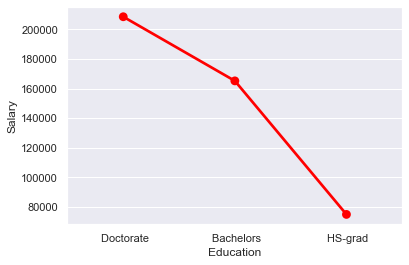

In [13]:
sns.pointplot(df['Education'],df['Salary'],data=df,ci=None,color='red',figsize=(20,8))


#### Conclusion:

From the above results we come to know that: 
    
mean of salary (Doctorate) - mean of salary (Bachelors) = 43274.0667

mean of salary (HS-Grad) - mean of salary (Bachelors) = -90114.1556

mean of salary (HS-Grad) - mean of salary (Doctorate) = -133388.2222 

mean of salary of (Doctorate) > mean of salary (Bachelors) > mean of salary (HS-Grad).

*(From the plot & table  we clearly infer that mean salary of Doctorate is compartively higher than the Bachelors and HS-Grad. HS-Grad have the lowest mean salary than other two. 

From the above table we infer that p_values for the all combinations are less than the significance level (0.05).So, we can reject the null hypothesis & confirms that their is a statistically significance differernce in the mean of the combinations.

#### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### Solution:

#### Step: 1 Formulate the Null & Alternate Hypothesis.

H0 : The mean of salary of the 40 individuals is same with different levels/categories of Occupation.

H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Occupation.

#### Step: 2 Create Anova Table.


Let us now perform One Way ANOVA with the variable 'Occupation' with respect to 'Salary'.

In [14]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

#### Step: 3 Compare p_value with the significance level (0.05).

As we know that if p_value < 0.05 ,we reject the null hypothesis ,or if the p_value > 0.05 , then fail to reject null hyphothesis or we accept null hypothesis. As we found that the p_value = 0.458508 > 0.05. We are fail to reject the null hypothesis.

#### Conclusion:

As we saw that in anova table the p_value = 0.458508 > 0.05 , so we are fail to reject the null hypothesis or we accept the null hypothesis and conclude that the mean of salary of the 40 individuals is same with different levels/categories of Occupation.

#### Check the means are significantly different or not ?

In [15]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [16]:
mc=MultiComparison(df["Salary"],df["Occupation"])
result=mc.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

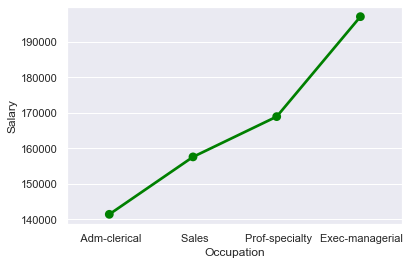

In [17]:
sns.pointplot(df['Occupation'],df['Salary'],data=df,ci=None,color='green',figsize=(20,8))

#### Conclusion:

From the above table we infer that p_values for the all combinations are greater than the significance level (0.05).So, we are fail to reject the null hypothesis & confirms that their is no statistically significance differernce in the mean of the combinations.

#### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

#### Solution:

Yes ,we reject the null hypothesis is rejected in the (1.2).

In [18]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [19]:
mc=MultiComparison(df["Salary"],df["Education"])
result=mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


<AxesSubplot:xlabel='Education', ylabel='Salary'>

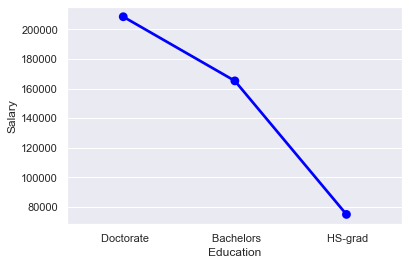

In [20]:
sns.pointplot(df['Education'],df['Salary'],data=df,ci=None,color='blue',figsize=(20,8))



#### Conclusion:

From the above results we come to know that:

mean of salary (Doctorate) - mean of salary (Bachelors) = 43274.0667

mean of salary (HS-Grad) - mean of salary (Bachelors) = -90114.1556

mean of salary (HS-Grad) - mean of salary (Doctorate) = -133388.2222

mean of salary of (Doctorate) > mean of salary (Bachelors) > mean of salary (HS-Grad).

*(From the plot & table we clearly infer that mean salary of Doctorate is compartively higher than the Bachelors and HS-Grad. HS-Grad have the lowest mean salary than other two.

From the above table we infer that p_values for the all combinations are less than the significance level (0.05).So, we can reject the null hypothesis & confirms that their is a  valid statistically significance differernce in the mean of the combinations of 'Education Variable'.

#### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

#### Solution:

In [30]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

In [32]:
sns.pointplot(x="Education",y=Salary,hue="Occupation",data=df)

NameError: name 'Salary' is not defined

#### Conclusion:

From the above plotted interaction plot we infer that lines are not parallel to each other, are crossing to each other which means their is some sort of interaction between the the two treatments.

* The mean salary of person with education level of doctorate and occupation as Prof-Specialty is maximum.

* The mean salary of person with education level of HS-Grad and occupation  as Sales is minimum.

* There is no such person in the dataset with education level of HS-Grad and occupation as Exec-Managerial.

* The mean salary of person with education level bachelors and occupation as Exec-Managerial is greater than the person with education level bachelor and occupation as Admin-Clerical > Prof-Specialty.

* The mean salary of person with education level of bachelors with occupation as Ex-Managerial and education level of bachelors and occupation as Sales are same.

* The mean salary of person with education level of doctorate with occupation in a order as Prof-Specialty > Ex-Managerial > Sales > Admin-Clerical.



#### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

#### Solution:

#### Step: 1 Formulate the Null & Alternate Hypothesis.

##### The Hypothesis for the Two Way ANOVA for Education are:

* H0 : The mean of salary of the 40 individuals is same with different levels/categories of Eduaction.

* H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Education.

##### The Hypothesis for the Two Way ANOVA for Occupation are:

* H0 : The mean of salary of the 40 individuals is same with different levels/categories of Occupation.

* H1 : The mean of salary of the 40 individuals is different in atleast one level/category of Occupation.

#### The Hypothesis for the Two Way ANOVA for the Interaction between Education & Occupation are:

* H0: The mean of salary of 40 individuals is not impacting by the interaction between the independent variables , we can say that interaction is not playing a role in the changing the mean value of salary at either Education or Occupation.

* H1: The mean of salary of 40 individuals is impacting by the interaction between the independent variables , we can say that interaction is playing a role in the changing the mean value of salary at either Education or Occupation.



#### Step: 2 Create Anova Table.

In [33]:
formula = 'Salary ~ C(Education)+C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

#### Step: 3 Compare p_value with the significance level (0.05).

As we know that if p_value < 0.05 ,we reject the null hypothesis ,or if the p_value > 0.05 , then fail to reject null hyphothesis or we accept null hypothesis. 

* As we found in case of Education variable that the p_value = 5.466264e-12 < 0.05. We can reject the null hypothesis.

* As we found in case of Occupation variable that the p_value = 7.211580e-02 > 0.05. We fail to reject the null hypothesis.

* As we found in case of Interaction of two independent variable  ( Education , Occupation) on the dependent variabale Salary that the p_value = 2.232500e-05 < 0.05. We can reject the null hypothesis.


#### Conclusion:

As we know that if p_value < 0.05 ,we reject the null hypothesis ,or if the p_value > 0.05 , then fail to reject null hyphothesis or we accept null hypothesis.

* As we found in case of Education variable that the p_value = 5.466264e-12 < 0.05. We can reject the null hypothesis.So the mean of salary of the 40 individuals is different in atleast one level/category of Education.


* As we found in case of Occupation variable that the p_value = 7.211580e-02 > 0.05. We fail to reject the null hypothesis.So The mean of salary of the 40 individuals is same with different levels/categories of Occupation.


*  We found in case of Interaction of two independent variable ( Education , Occupation) on the dependent variabale Salary that the p_value = 2.232500e-05 < 0.05. We can reject the null hypothesis.The mean of salary of 40 individuals is impacting by the interaction between the independent variables , we can say that interaction is playing a role in the changing the mean value of salary at either Education or Occupation. 



#### 1.7 Explain the business implications of performing ANOVA for this particular case study.

As we know that anova means analysis of variance  , in anova we are actually comparing the means of different sample & check whether their means are equal or not.After performing the anova on this case study , we infer that how Salary is effected by the Education and Occupation at their differnet levels.The mean of salary of 40 individuals is impacting by the interaction between the independent variables , we can say that interaction is playing a role in the changing the mean value of salary at either Education or Occupation. We saw that the mean of salary of the 40 individuals is different in atleast one level/category of Education and the mean of salary of the 40 individuals is same with different levels/categories of Occupation.We found that Occupation (Independent Variable) has significant impact on the salary (Dependent Variable) of the 40 individuals in the given dataset.

#### Problem Statement 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

#### Loading the Dataset CSV file of Problem Statement 2.

In [34]:
df_1=pd.read_csv("Education - Post 12th Standard.csv")

#### Checking the Records of the Dataset.

In [35]:
df_1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

Head function will tell you the top records in the Dataset. By default python shows you only top 5 records.

#### Data Dictionary of the Dataset.


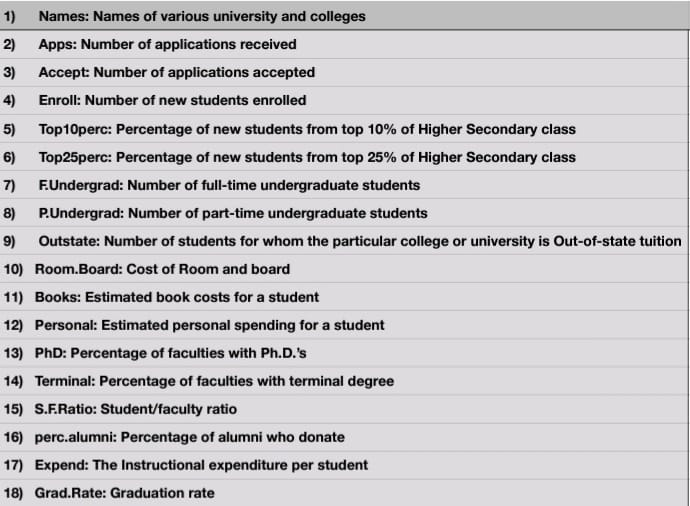

In [36]:
from IPython import  display
display.Image("Data Dictionary.jpg")

#### EDA (Exploratory Data Analysis)

#### Checking the Shape of the Dataframe.

In [37]:
df_1.shape

(777, 18)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The Education - Post 12th Standard data set has 777 observations (rows) and 18 variables (columns) in the dataset.

#### Check the Appropriateness of Datatypes

In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

info() function is used to check the Information about the data and the datatypes of each respective attributes.From the above results we can see that there is no missing value present in the dataset.Their are total 777 rows & 18 columns in this dataset,indexed from 0 to 776. Out of 16 are int64 , 1 is float64 & 1 is object. Memory used by dataset is 109.4+ KB.

#### Checking the Summary of the Dataset.

In [39]:
df_1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the all numeric variables present in the dataset

#### Checking the Null Values.

In [40]:
df_1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### Checking for the Duplicate Rows.

In [41]:
dups= df_1.duplicated()
print("Number of duplicated row in the datset = %d" %(dups.sum()))

Number of duplicated row in the datset = 0


#### Separating the Categorical & Numerical features for further analysis.

In [42]:
df_1_cat = df_1.select_dtypes(include = ['object'])
df_1_cat

Names
0      Abilene Christian University
1                Adelphi University
2                    Adrian College
3               Agnes Scott College
4         Alaska Pacific University
..                              ...
772         Worcester State College
773               Xavier University
774  Xavier University of Louisiana
775                 Yale University
776    York College of Pennsylvania

[777 rows x 1 columns]

In [43]:
df_1_num = df_1.select_dtypes(include = ['float64', 'int64'])
df_1_num

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0        7440        3300    450      2200   70        78       18.1   
1       12280        6450    750      1500   29        30       12.2   
2       11250        3750    400      1165   53        66       12.9   
3       12960        5450    450       875   92        97        7.7   
4        7560        4120    800      1500   76        72       11.9   
..        ...         ...    ...       ...  ...       ...        ...   
772      6797        3900    500      1200   60        60       21.0   
773     11520        4960    600      1250   73        75       13.3   
774      6900        4200    617       781   67        75       14.4   
775     19840        6510    630      2115   96        96        5.8   
776      4990        3560    500      1250   75        75       18.1   

     perc.alumni  Expend  Grad.Rate  
0             12    7041         60  
1             16   10527         56  
2             30    8735         54  
3             37   19016         59  
4              2   10922         15  
..           ...     ...        ...  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[777 rows x 17 columns]

#### Checking the Outliers in the dataset.

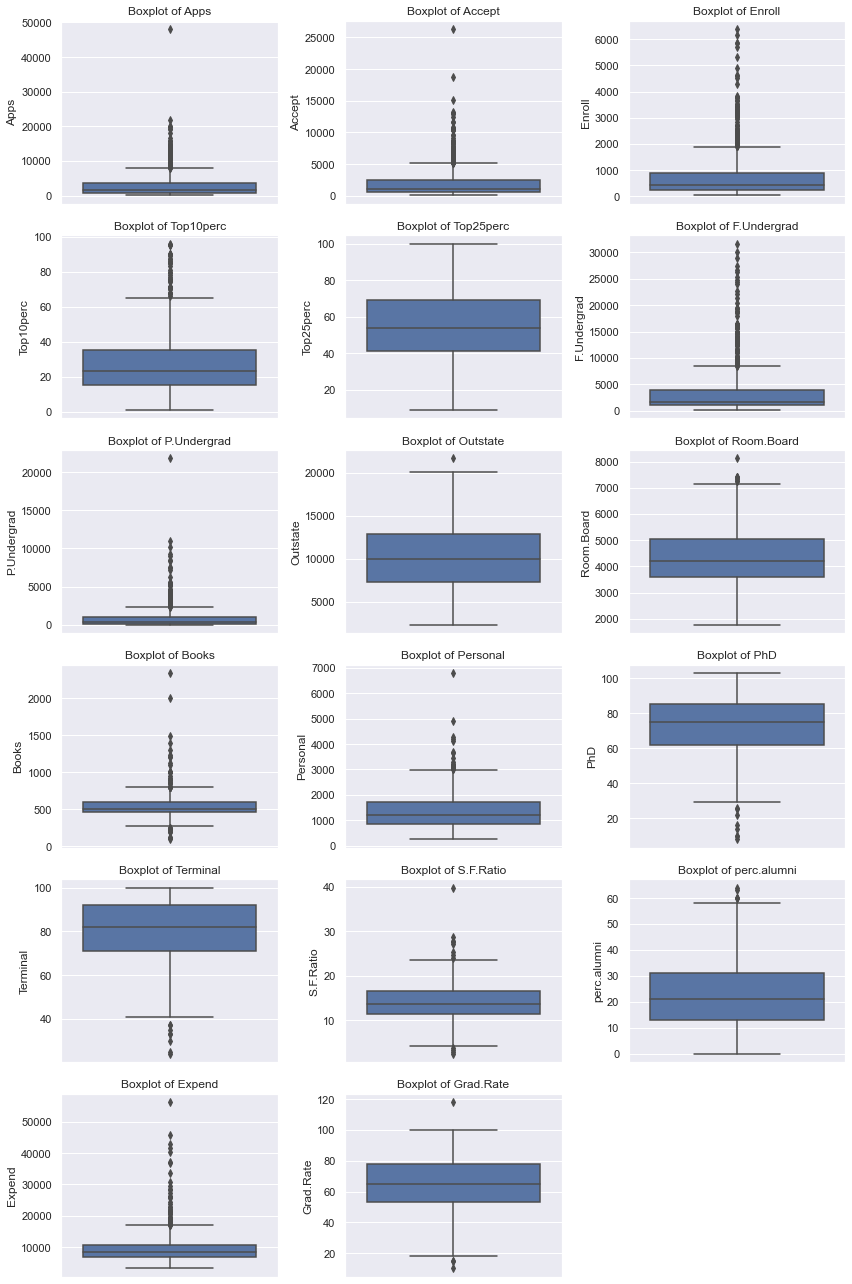

In [44]:
plt.figure(figsize= (12,18))
feature_list = df_1_num.columns
for i in range (len(feature_list)):
    plt.subplot(6,3 ,i+1)
    sns.boxplot(y= df_1_num[feature_list[i]],data=df_1_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()


There is no outlier present in the top25perc column & rest all other columns have significant presence of outliers.

#### Observation:

EDA helps in getting insights from Data :

* Data has been loaded correctly into the pandas dataframe.

* There are 777 rows and 18 features (columns). 


Quality : We found their is no such features that had missing values, bad data which had to be cleaned. We also found their is no anomalies in the data based on the analysis/business context which had to be treated.There is no outlier present in the top25perc column & rest all other columns have  significant presence of outliers.Phd has maximum value of 103 as bad value, this has to be cleaned. Graduation Rate has maximum value of 118 as bad value, this has to be cleaned. 



Quantum of Data: We know about how many valid observations and relevant features are available to proceed with the prediction. This will help in understanding some of the model evaluation parameters better and give us an idea on how the model performance can be improved further.

Several statistical measurements and distributions corresponding  numeric features. This can be useful is choosing an apporpriate technique to build the classification model which is the next step.

Frequency and distribution of the features. This will help us validate the assumptions that are made before implementing a technique.

Relevance of data w.r.t the objective: Univariate, Bivariate, Multivariate analysis helps us understand if the features will indeed help in classifying the admission procedure  in the university or college after 12th class i.e. what is acceptance rate , number of application received ,number new students enrolled in full time grad and part gard programs ,what are their expenses like room cost , book cost & personal expensesand the grad rate of the respective university or college.

A thorough EDA helps to avoid any bad data leakage to further steps. It also, helps us understand the current business situation and already gives us an insight on several parameters. It helps us be more confident in taking decisions while we move further implementing the several predictive modelling and machine learning techniques.

#### Check and Treatment Bad Values

As we found that Phd max value and Grad.Rate max value found to be inappropirate , so we need cleaned them.

Lets check the anomaly observed in 'PhD','Grad.Rate'

We know max value of percentage can be 100. But in Phd (Percentage of faculties with PhD's) we found max value of 103 this has to be cleaned.

In [45]:
df_1[df_1['PhD'] > 100]

Names  Apps  Accept  Enroll  Top10perc  \
582  Texas A&M University at Galveston   529     481     243         22   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
582         47         1206          134      4860        3122    600   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
582       650  103        88       17.4           16    6415         43

In [46]:
df_1[df_1['Grad.Rate'] > 100]

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

From above records we observe that '103' in PhD and '118' in Grad.Rate has been enterd maybe because the data was not available or by mistake of data entry operator. However, this data has to be imputed. We can either impute it with mean/median value or make some assumption.

Let's  Phd (Percentage of faculties with PhD's) impute the mean/median. We are imputing this with median.

In [47]:
df_1["PhD"]=np.where(df_1["PhD"]==103,df_1["PhD"].median(),df_1["PhD"])

In [48]:
df_1.iloc[582]

Names          Texas A&M University at Galveston
Apps                                         529
Accept                                       481
Enroll                                       243
Top10perc                                     22
Top25perc                                     47
F.Undergrad                                 1206
P.Undergrad                                  134
Outstate                                    4860
Room.Board                                  3122
Books                                        600
Personal                                     650
PhD                                         75.0
Terminal                                      88
S.F.Ratio                                   17.4
perc.alumni                                   16
Expend                                      6415
Grad.Rate                                     43
Name: 582, dtype: object

In [49]:
df_1['PhD'].describe()

count    777.000000
mean      72.624196
std       16.291967
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      100.000000
Name: PhD, dtype: float64

We have successfully impute the median value with bad value present in PhD.

Let's Grad.Rate (Graduation Rate) impute the mean/median. We are imputing this with median.

In [50]:
df_1["Grad.Rate"]=np.where(df_1["Grad.Rate"]==118,df_1["Grad.Rate"].median(),df_1["Grad.Rate"])

In [51]:
df_1.iloc[95]

Names          Cazenovia College
Apps                        3847
Accept                      3433
Enroll                       527
Top10perc                      9
Top25perc                     35
F.Undergrad                 1010
P.Undergrad                   12
Outstate                    9384
Room.Board                  4840
Books                        600
Personal                     500
PhD                         22.0
Terminal                      47
S.F.Ratio                   14.3
perc.alumni                   20
Expend                      7697
Grad.Rate                   65.0
Name: 95, dtype: object

In [52]:
df_1['Grad.Rate'].describe()

count    777.000000
mean      65.395109
std       17.073737
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64

We have successfully impute the median value with bad value present in Grad.Rate.

In [53]:
df_1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.624196    16.291967     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.395109    17.073737    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    100.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    100.0

#### Data Scaling

In [54]:
from scipy.stats import zscore
df_scaled=df_1_num.apply(zscore)

In [55]:
df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [56]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


In [57]:
df_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated
Ha: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [58]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

ModuleNotFoundError: No module named 'factor_analyzer'

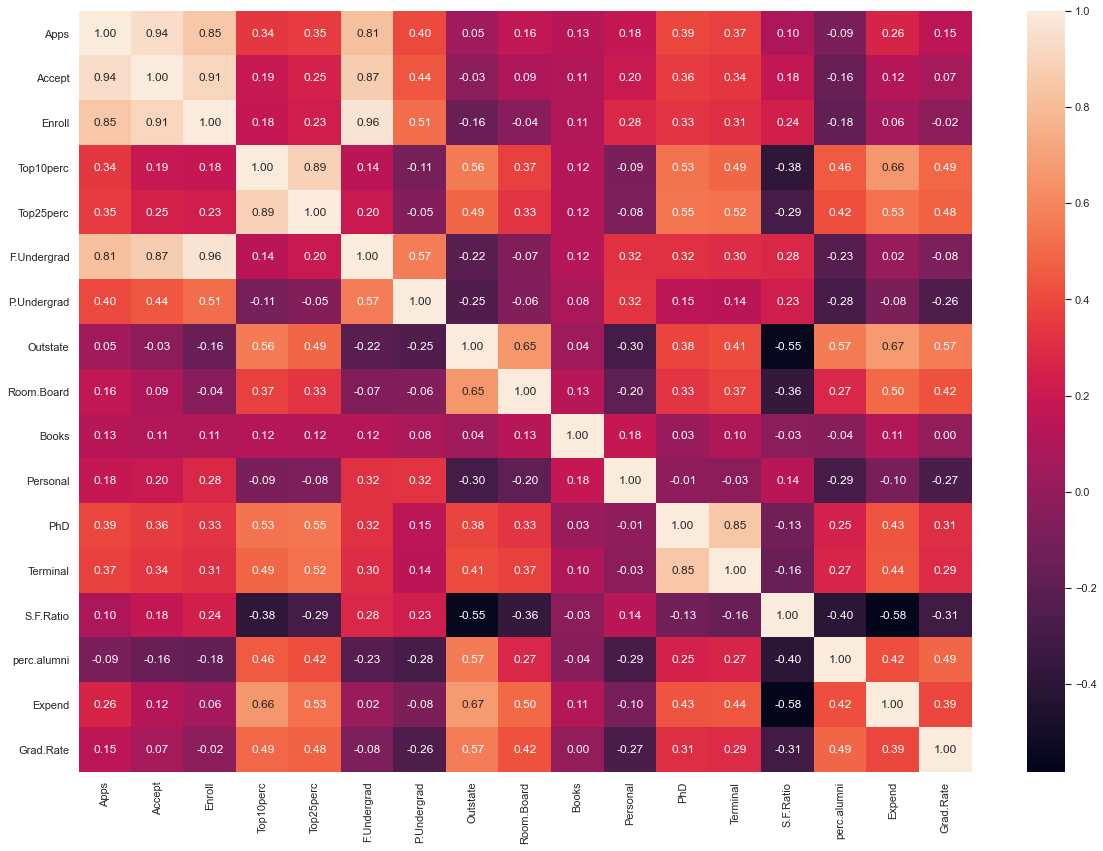

In [59]:
#Check for presence of correlations
plt.figure(figsize = (20,14))
sns.heatmap(df_scaled.corr(), annot=True,fmt='.2f');


#### Insights

From the above correlation table we conclude that F.Undergrad with Enroll have max value of correlation i.e. 0.97. Apps with Accept also have a strong correaltion value i.e. 0.96.Expend with S.F.Ratio have min value of correlation i.e. -0.65.

KMO Test The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is. Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [60]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

ModuleNotFoundError: No module named 'factor_analyzer'

#### Result

All these tests and correlation states that on given data  we can apply PCA.

#### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### Solution:

In [ ]:
df_1.head(5)

#### Univariate Analysis

In [ ]:
sns.histplot(df_1_num['Apps'], kde=True)
plt.show()

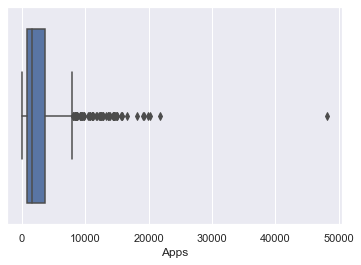

In [61]:
sns.boxplot(df_1_num['Apps'])
plt.show()

In [62]:
df_1_num["Apps"].describe().T

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

#### Insights

* Number of Applications received ranges from a minimum of 81 to maximum of 48094.
* The average number of applications received is around 3001.638353.
* Mean of number of applications received is 3001.63 which is higher than the median value (1558) indicating that the ditribution is right tailed.

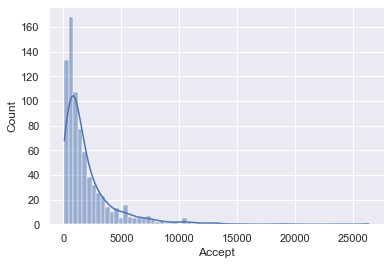

In [63]:
sns.histplot(df_1_num['Accept'], kde=True)
plt.show()

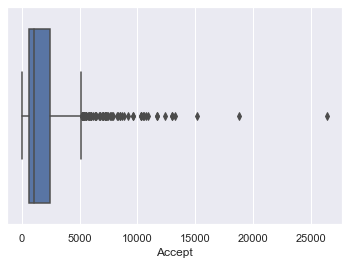

In [64]:
sns.boxplot(df_1_num['Accept'])
plt.show()

In [65]:
df_1_num["Accept"].describe().T

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64

#### Insights

* Numbers of Applications accepted ranges from a minimum of 72 to maximum of 26330.
* The average number of applications accepetd is around 2018.804376.
* Mean of number of applications accepted is 2018.80 which is higher than the median value (1110) indicating that the ditribution is right tailed.

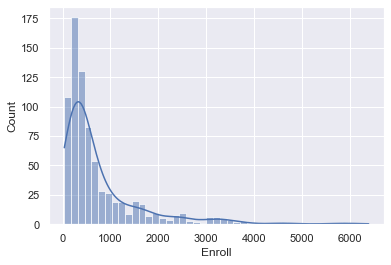

In [66]:
sns.histplot(df_1_num['Enroll'], kde=True)
plt.show()

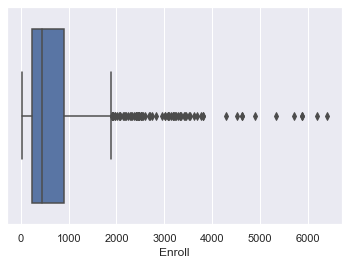

In [67]:
sns.boxplot(df_1_num['Enroll'])
plt.show()

In [68]:
df_1_num["Enroll"].describe().T

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64

#### Insights

* Numbers of New Students Enrolled ranges from a minimum of 35 to maximum of 6392.
* The average number of New Students Enrolled is around 779.97.
* Mean of number of applications accepted is 779.97 which is higher than the median value (434) indicating that the ditribution is right tailed.

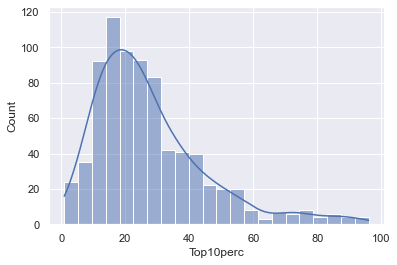

In [69]:
sns.histplot(df_1_num['Top10perc'], kde=True)
plt.show()

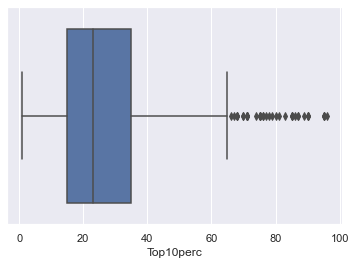

In [70]:
sns.boxplot(df_1_num['Top10perc'])
plt.show()

In [71]:
df_1_num["Top10perc"].describe().T

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64

#### Insights

* Percentage of new students from top 10% of Higher Secondary Class ranges from a minimum of 1.0 to maximum of 96.00.
* The average Percentage of new students from top 10% of Higher Secondary Class is around 27.55.
* Mean of Percentage of new students from top 10% of Higher Secondary Class is 27.558559 which is higher than the median value (23.00) indicating that the ditribution is right tailed.

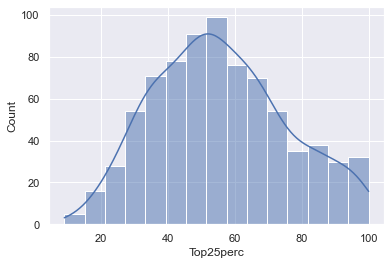

In [72]:
sns.histplot(df_1_num['Top25perc'], kde=True)
plt.show()

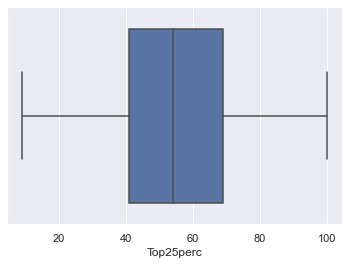

In [73]:
sns.boxplot(df_1_num['Top25perc'])
plt.show()

In [74]:
df_1_num["Top25perc"].describe().T

count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64

#### Insights

* Percentage of new students from top 25% of Higher Secondary Class ranges from a minimum of 9.000000 to maximum of 100.00.
* The average Percentage of new students from top 25% of Higher Secondary Class is around 55.79.
* Mean of Percentage of new students from top 25% of Higher Secondary Class is 55.796654 which is approx equal to the median value (54.00) indicating that the ditribution is normal.

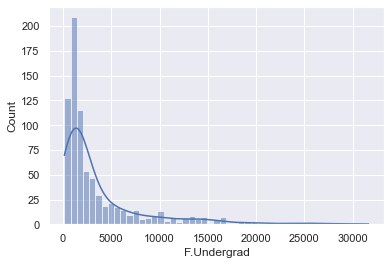

In [75]:
sns.histplot(df_1_num['F.Undergrad'], kde=True)
plt.show()

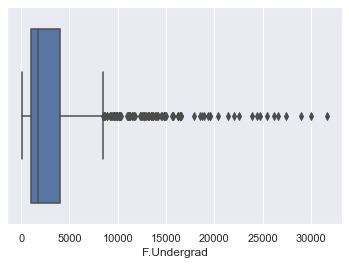

In [76]:
sns.boxplot(df_1_num['F.Undergrad'])
plt.show()

In [77]:
df_1_num["F.Undergrad"].describe().T

count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64

#### Insights

* Numbers of Full Time Undergraduate students ranges from a minimum of 139.000000 to maximum of 31643.
* The average number of Full Time Undergraduate students is around 3699.907336.
* Mean of number of Full Time Undergraduate students is 3699.907336 which is higher than the median value (1707) indicating that the ditribution is right tailed.

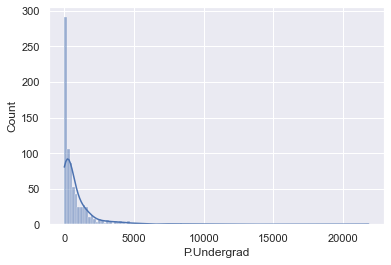

In [78]:
sns.histplot(df_1_num['P.Undergrad'], kde=True)
plt.show()

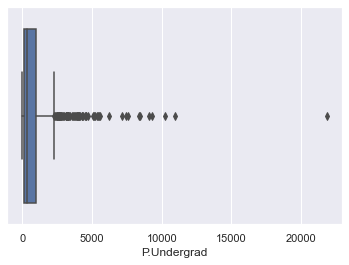

In [79]:
sns.boxplot(df_1_num['P.Undergrad'])
plt.show()

In [80]:
df_1_num["P.Undergrad"].describe().T

count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64

#### Insights

* Numbers of Part Time Undergraduate students ranges from a minimum of 1.0 to maximum of 21836.
* The average number of Part Time Undergraduate students is around 855.298584.
* Mean of number of Part Time Undergraduate students is 855.298584 which is higher than the median value (353) indicating that the ditribution is right tailed.

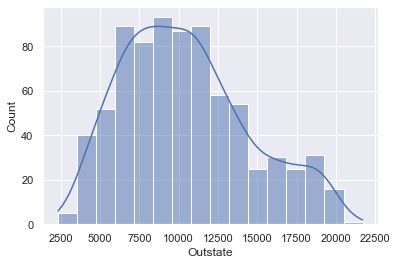

In [81]:
sns.histplot(df_1_num['Outstate'], kde=True)
plt.show()

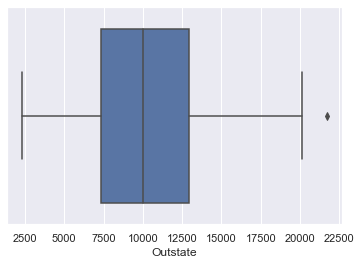

In [82]:
sns.boxplot(df_1_num['Outstate'])
plt.show()

In [83]:
df_1['Outstate'].describe().T

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64

#### Insights

* Numbers of outstate students ranges from a minimum of 2340.000000 to maximum of 21700.
* The average number of outstate students is around 10440.669241.
* Mean of number of outstate students is 10440.669241 which is higher than the median value (9990) indicating that the ditribution is slightly right tailed.

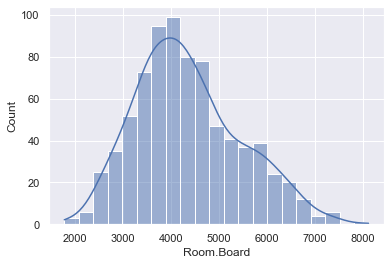

In [84]:
sns.histplot(df_1_num['Room.Board'], kde=True)
plt.show()

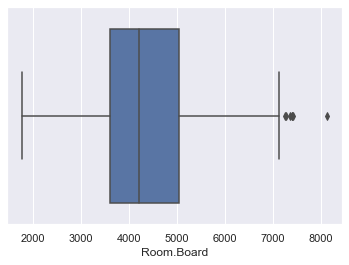

In [85]:
sns.boxplot(df_1_num['Room.Board'])
plt.show()

In [86]:
df_1_num['Room.Board'].describe().T

count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64

#### Insights

* Cost of room & board ranges from a minimum of 1780 to maximum of 8124.
* The average Cost of room & board for students is around 4357.526384.
* Mean of Cost of room & board for students is 4357.526384 which is higher than the median value (4200) indicating that the ditribution is slightly right tailed.

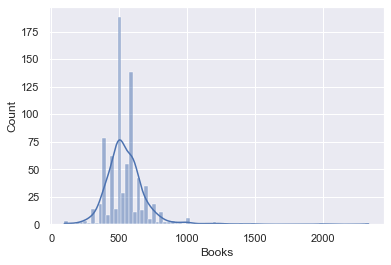

In [87]:
sns.histplot(df_1_num['Books'], kde=True)
plt.show()

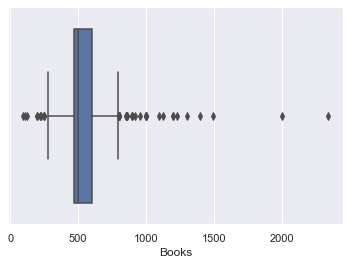

In [88]:
sns.boxplot(df_1_num['Books'])
plt.show()

In [89]:
df_1_num["Books"].describe().T

count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64

#### Insights

* Estimated book costs for students ranges from a minimum of 96 to maximum of 2340.
* The average of Estimated book costs for students is around 549.380952.
* Mean of Cost of book for students is 549.380952 which is higher than the median value (500.000000) indicating that the ditribution is slightly right tailed.

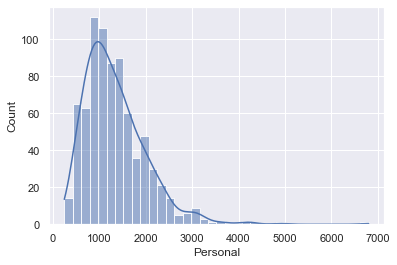

In [90]:
sns.histplot(df_1_num['Personal'], kde=True)
plt.show()

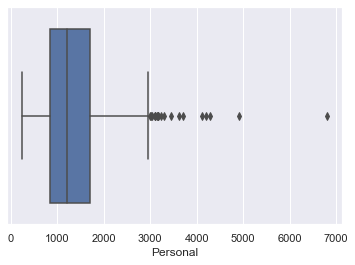

In [91]:
sns.boxplot(df_1_num['Personal'])
plt.show()

In [92]:
df_1_num["Personal"].describe().T

count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64

#### Insights

* Estimated Persoanl Spending for students ranges from a minimum of 250 to maximum of 6800.
* The average of Persoanl Spending for students is around 1340.642214.
* Mean of Personal spending for students is 1340.642214 which is higher than the median value (1200.000000) indicating that the ditribution is right tailed.

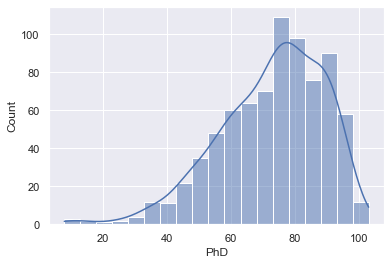

In [93]:
sns.histplot(df_1_num['PhD'], kde=True)
plt.show()

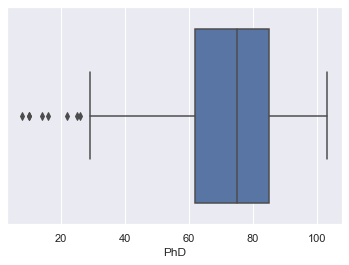

In [94]:
sns.boxplot(df_1_num['PhD'])
plt.show()

In [95]:
df_1_num["PhD"].describe().T

count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64

#### Insights

* Percentage of Faculty with Phd ranges from a minimum of 8 to maximum of 100.
* The average of Percentage of Faculty with Phd is around 72.660232.
* Mean of Percentage of Faculty with Phd  is 72.660232 which is lower than the median value (75) indicating that the ditribution is left tailed.

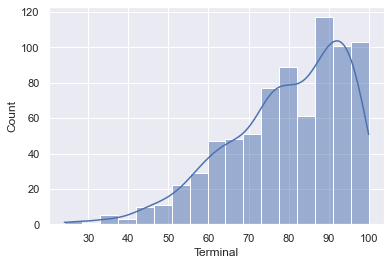

In [96]:
sns.histplot(df_1_num['Terminal'], kde=True)
plt.show()

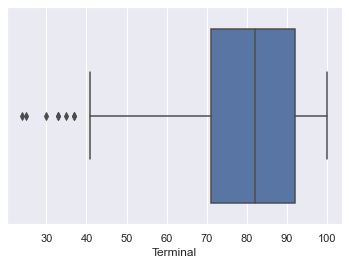

In [97]:
sns.boxplot(df_1_num['Terminal'])
plt.show()

In [98]:
df_1_num['Terminal'].describe().T

count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64

#### Insights

* Percentage of faculties with  terminal degree ranges from a minimum of 24 to maximum of 100.
* Average Percentage of faculties with  terminal degree is  79.702703.
* Mean of Percentage of faculties with  terminal degree  is 79.702703 which is lower than the median value (82) indicating that the ditribution is left tailed.

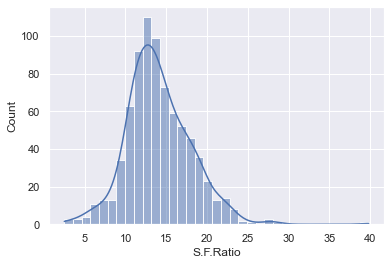

In [99]:
sns.histplot(df_1_num['S.F.Ratio'], kde=True)
plt.show()

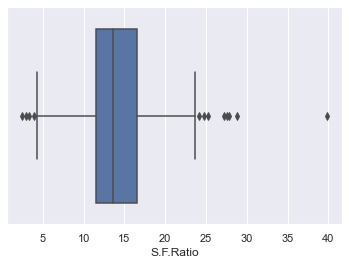

In [100]:
sns.boxplot(df_1_num['S.F.Ratio'])
plt.show()

In [101]:
df_1_num["S.F.Ratio"].describe().T

count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64

#### Insights

* Student/Faculty ratio ranges from a minimum of 2.5 to maximum of  39.80.
* Average of Student/Faculty ratio is 14.089704.
* Mean of Student/Faculty ratio is 14.089704 which is approx equal to the median value (13.60~14.0) indicating that the ditribution is normal.

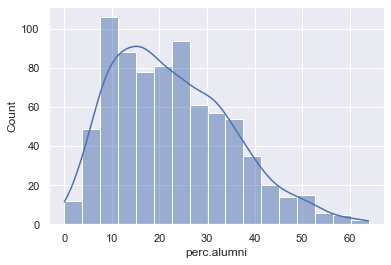

In [102]:
sns.histplot(df_1_num['perc.alumni'], kde=True)
plt.show()

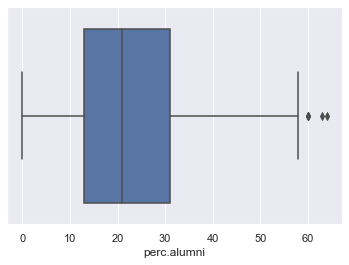

In [103]:
sns.boxplot(df_1_num['perc.alumni'])
plt.show()

In [104]:
df_1_num['perc.alumni'].describe().T

count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64

#### Insights

* Percentage of alumni who donate ranges from a minimum of 0 to maximum of 64.0.
* Average of Percentage of alumni who donate is 22.743887.
* Mean of Percentage of alumni who donate  is 22.743887 which is higher than the median value (21) indicating that the ditribution is right tailed.

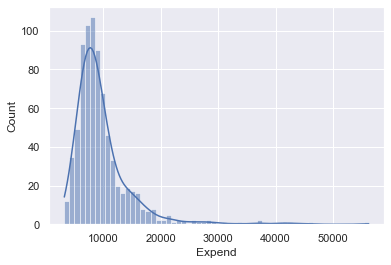

In [105]:
sns.histplot(df_1_num['Expend'], kde=True)
plt.show()

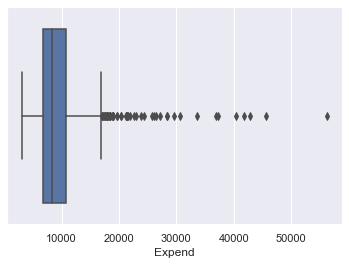

In [106]:
sns.boxplot(df_1_num['Expend'])
plt.show()

In [107]:
df_1_num['Expend'].describe().T

count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64

#### Insights

* Instructionnal expenditure per studnet ranges from a minimum of  3186 to maximum of 56233.
* Average of Instructionnal expenditure per studnet is 9660.171171.
* Mean of  Instructionnal expenditure per studnet is 9660.171171 which is higher than the median value (8377) indicating that the ditribution is right tailed.

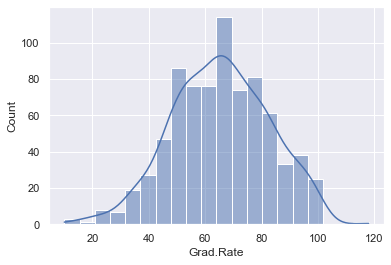

In [108]:
sns.histplot(df_1_num['Grad.Rate'], kde=True)
plt.show()

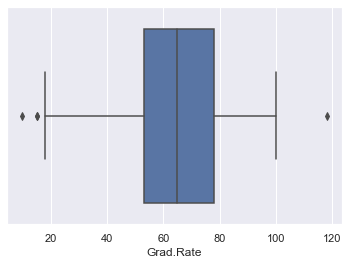

In [109]:
sns.boxplot(df_1_num['Grad.Rate'])
plt.show()

In [110]:
df_1_num['Grad.Rate'].describe().T

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64

#### Insights

* Graduation rate ranges from a minimum of 10 to maximum of 100.
* Average Graduation rate is 65.46332.
* Mean of Graduation rate is 65.46332 which is approx equal to the median value (65) indicating that the ditribution is somehow normal.

#### Bivariate Analysis

In [111]:
df_1_num[['Apps','Accept']].describe().T

count         mean          std   min    25%     50%     75%      max
Apps    777.0  3001.638353  3870.201484  81.0  776.0  1558.0  3624.0  48094.0
Accept  777.0  2018.804376  2451.113971  72.0  604.0  1110.0  2424.0  26330.0

#### Insights 

* Number of Applications received  ranges from a minimum of 81 to maximum of 48094.

* The average number of applications received is around 3001.638353.

* Numbers of Applications accepted ranges from a minimum of 72 to maximum of 26330.

* The average number of applications accepetd is around 2018.804376.

* Mean of number of applications received is 3001.63 which is higher than the median value (1558) indicating that the ditribution is right tailed.

* Mean of number of applications accepted is 2018.80 which is higher than the median value (1110) indicating that the ditribution is right tailed.







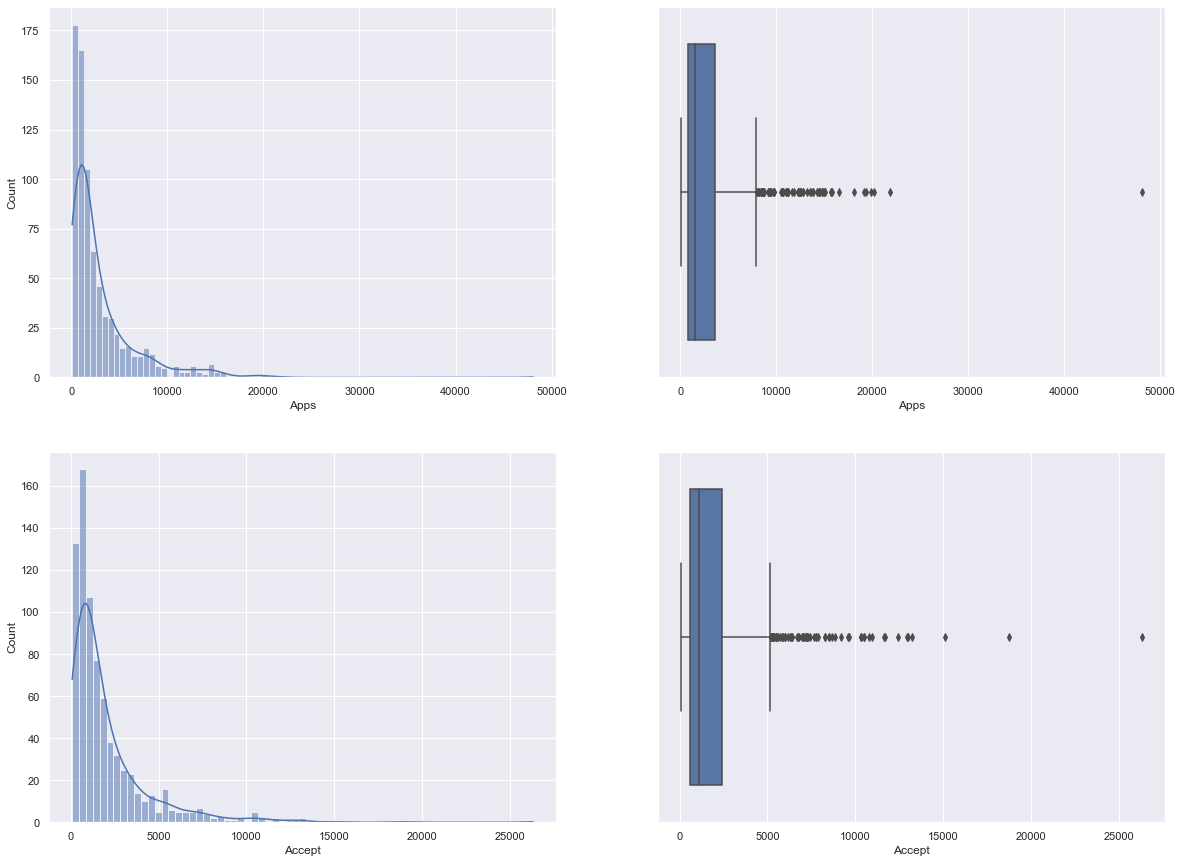

In [112]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df_1_num['Apps'], kde=True, ax=axes[0][0])
sns.boxplot(x='Apps', data=df_1_num, ax=axes[0][1])
sns.histplot(df_1_num['Accept'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Accept', data=df_1_num , ax=axes[1][1])
plt.show()

#### Insights

Both Number of Applications Received  and Number of Applications Accepted  have ouliers in upper values.

In [113]:
df_1_num[['Accept','Enroll']].describe().T

count         mean          std   min    25%     50%     75%      max
Accept  777.0  2018.804376  2451.113971  72.0  604.0  1110.0  2424.0  26330.0
Enroll  777.0   779.972973   929.176190  35.0  242.0   434.0   902.0   6392.0

#### Insights

* Number of Applications Accepted ranges from a minimum of 72 to maximum of 26330.

* Number of New Students Enrolled ranges from a minimum of 35.0 to maximum of 6392.

* The average number of applications accepted is around 2018.80.

* The average number of new students enrolled is around 779.97.

* Mean of number of applications accepted is 2018.80 which is higher than the median value (1110) indicating that the ditribution is right tailed.

* Mean of number of new students enrolled is 779.97 which is higher than the median value (434) indicating that the ditribution is right tailed.





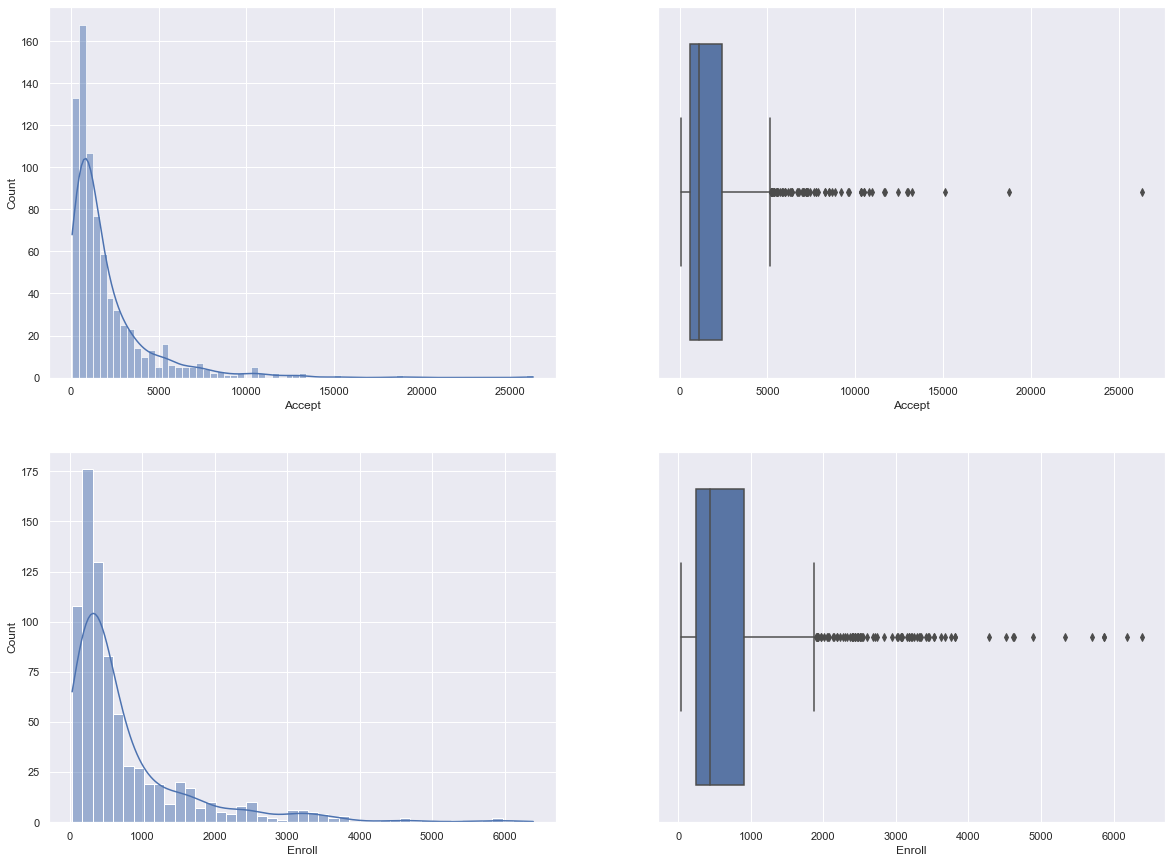

In [114]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df_1_num['Accept'], kde=True, ax=axes[0][0])
sns.boxplot(x='Accept', data=df_1_num, ax=axes[0][1])
sns.histplot(df_1_num['Enroll'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Enroll', data=df_1_num , ax=axes[1][1])
plt.show()

#### Insight

Both Number of Applications Accepted and Number of  New Students Enrolled have ouliers in upper values.

In [115]:
df_1_num[['F.Undergrad','P.Undergrad']].describe().T

count         mean          std    min    25%     50%     75%  \
F.Undergrad  777.0  3699.907336  4850.420531  139.0  992.0  1707.0  4005.0   
P.Undergrad  777.0   855.298584  1522.431887    1.0   95.0   353.0   967.0   

                 max  
F.Undergrad  31643.0  
P.Undergrad  21836.0

#### Insights

*  Number of Full Time Undergraduate Students ranges from a minimum of 139 to maximum of 31643.

* Number of Part Time Undergraduate Students ranges from a minimum of 1.0 to maximum of 21836.

* The average number of Full Time Undergraduate Students is around 3699.90.

* The average number of Part Time Undergraduate Students is around 855.29.

* Mean of number of Full Time Undergraduate Students is 3699.90 which is higher than the median value (1707.0) indicating that the ditribution is right tailed.

* Mean of number of Part Time Undergraduate Students is 855.298584 which is higher than the median value (353.0) indicating that the ditribution is right tailed.





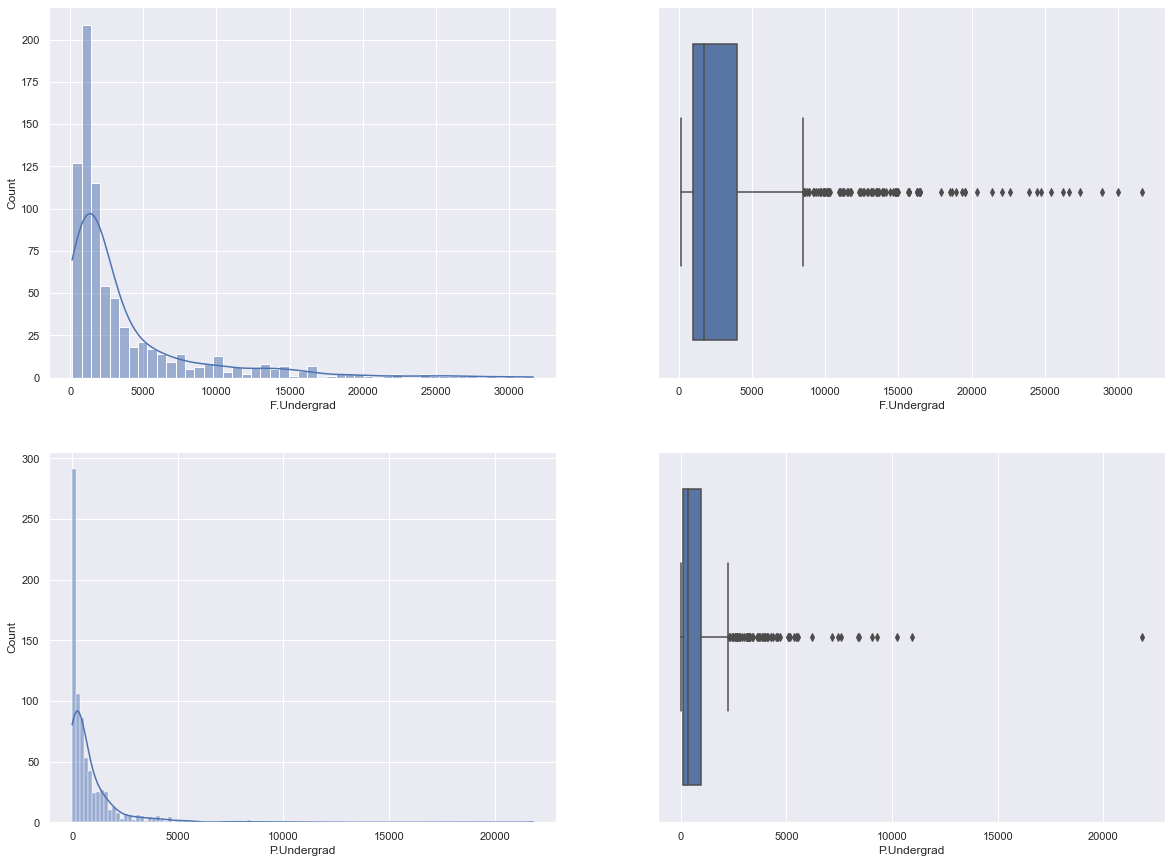

In [116]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df_1_num['F.Undergrad'], kde=True, ax=axes[0][0])
sns.boxplot(x='F.Undergrad', data=df_1_num, ax=axes[0][1])
sns.histplot(df_1_num['P.Undergrad'] , kde=True, ax=axes[1][0])
sns.boxplot(x='P.Undergrad', data=df_1_num , ax=axes[1][1])
plt.show()

#### Insights

Both Number of Full Time Undergraduate Students and Number of Part Time Undergraduate Students have ouliers in upper values.

#### Multivariate Analysis

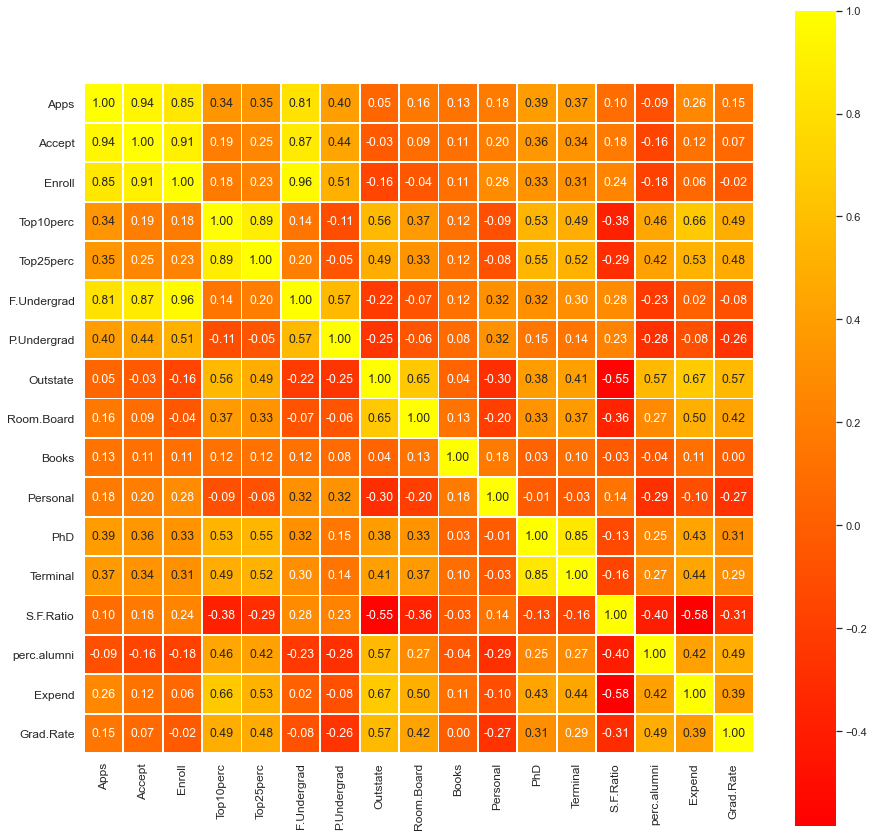

In [117]:
corr=df_1_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="autumn",linewidth=0.85,square=True,annot_kws={"size":12.25},fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(size=12)
plt.show()

#### Conclusion :

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.Darker Shades have lower Corealtion , while lighter shades have large values of correaltion as compared to darker shades values.Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.


#### Insights

From the above correlation table we conclude that F.Undergrad with Enroll have max value of correlation i.e. 0.96. Apps with Accept also have a strong correaltion value i.e. 0.94.Expend with S.F.Ratio have min value of correlation i.e. -0.58

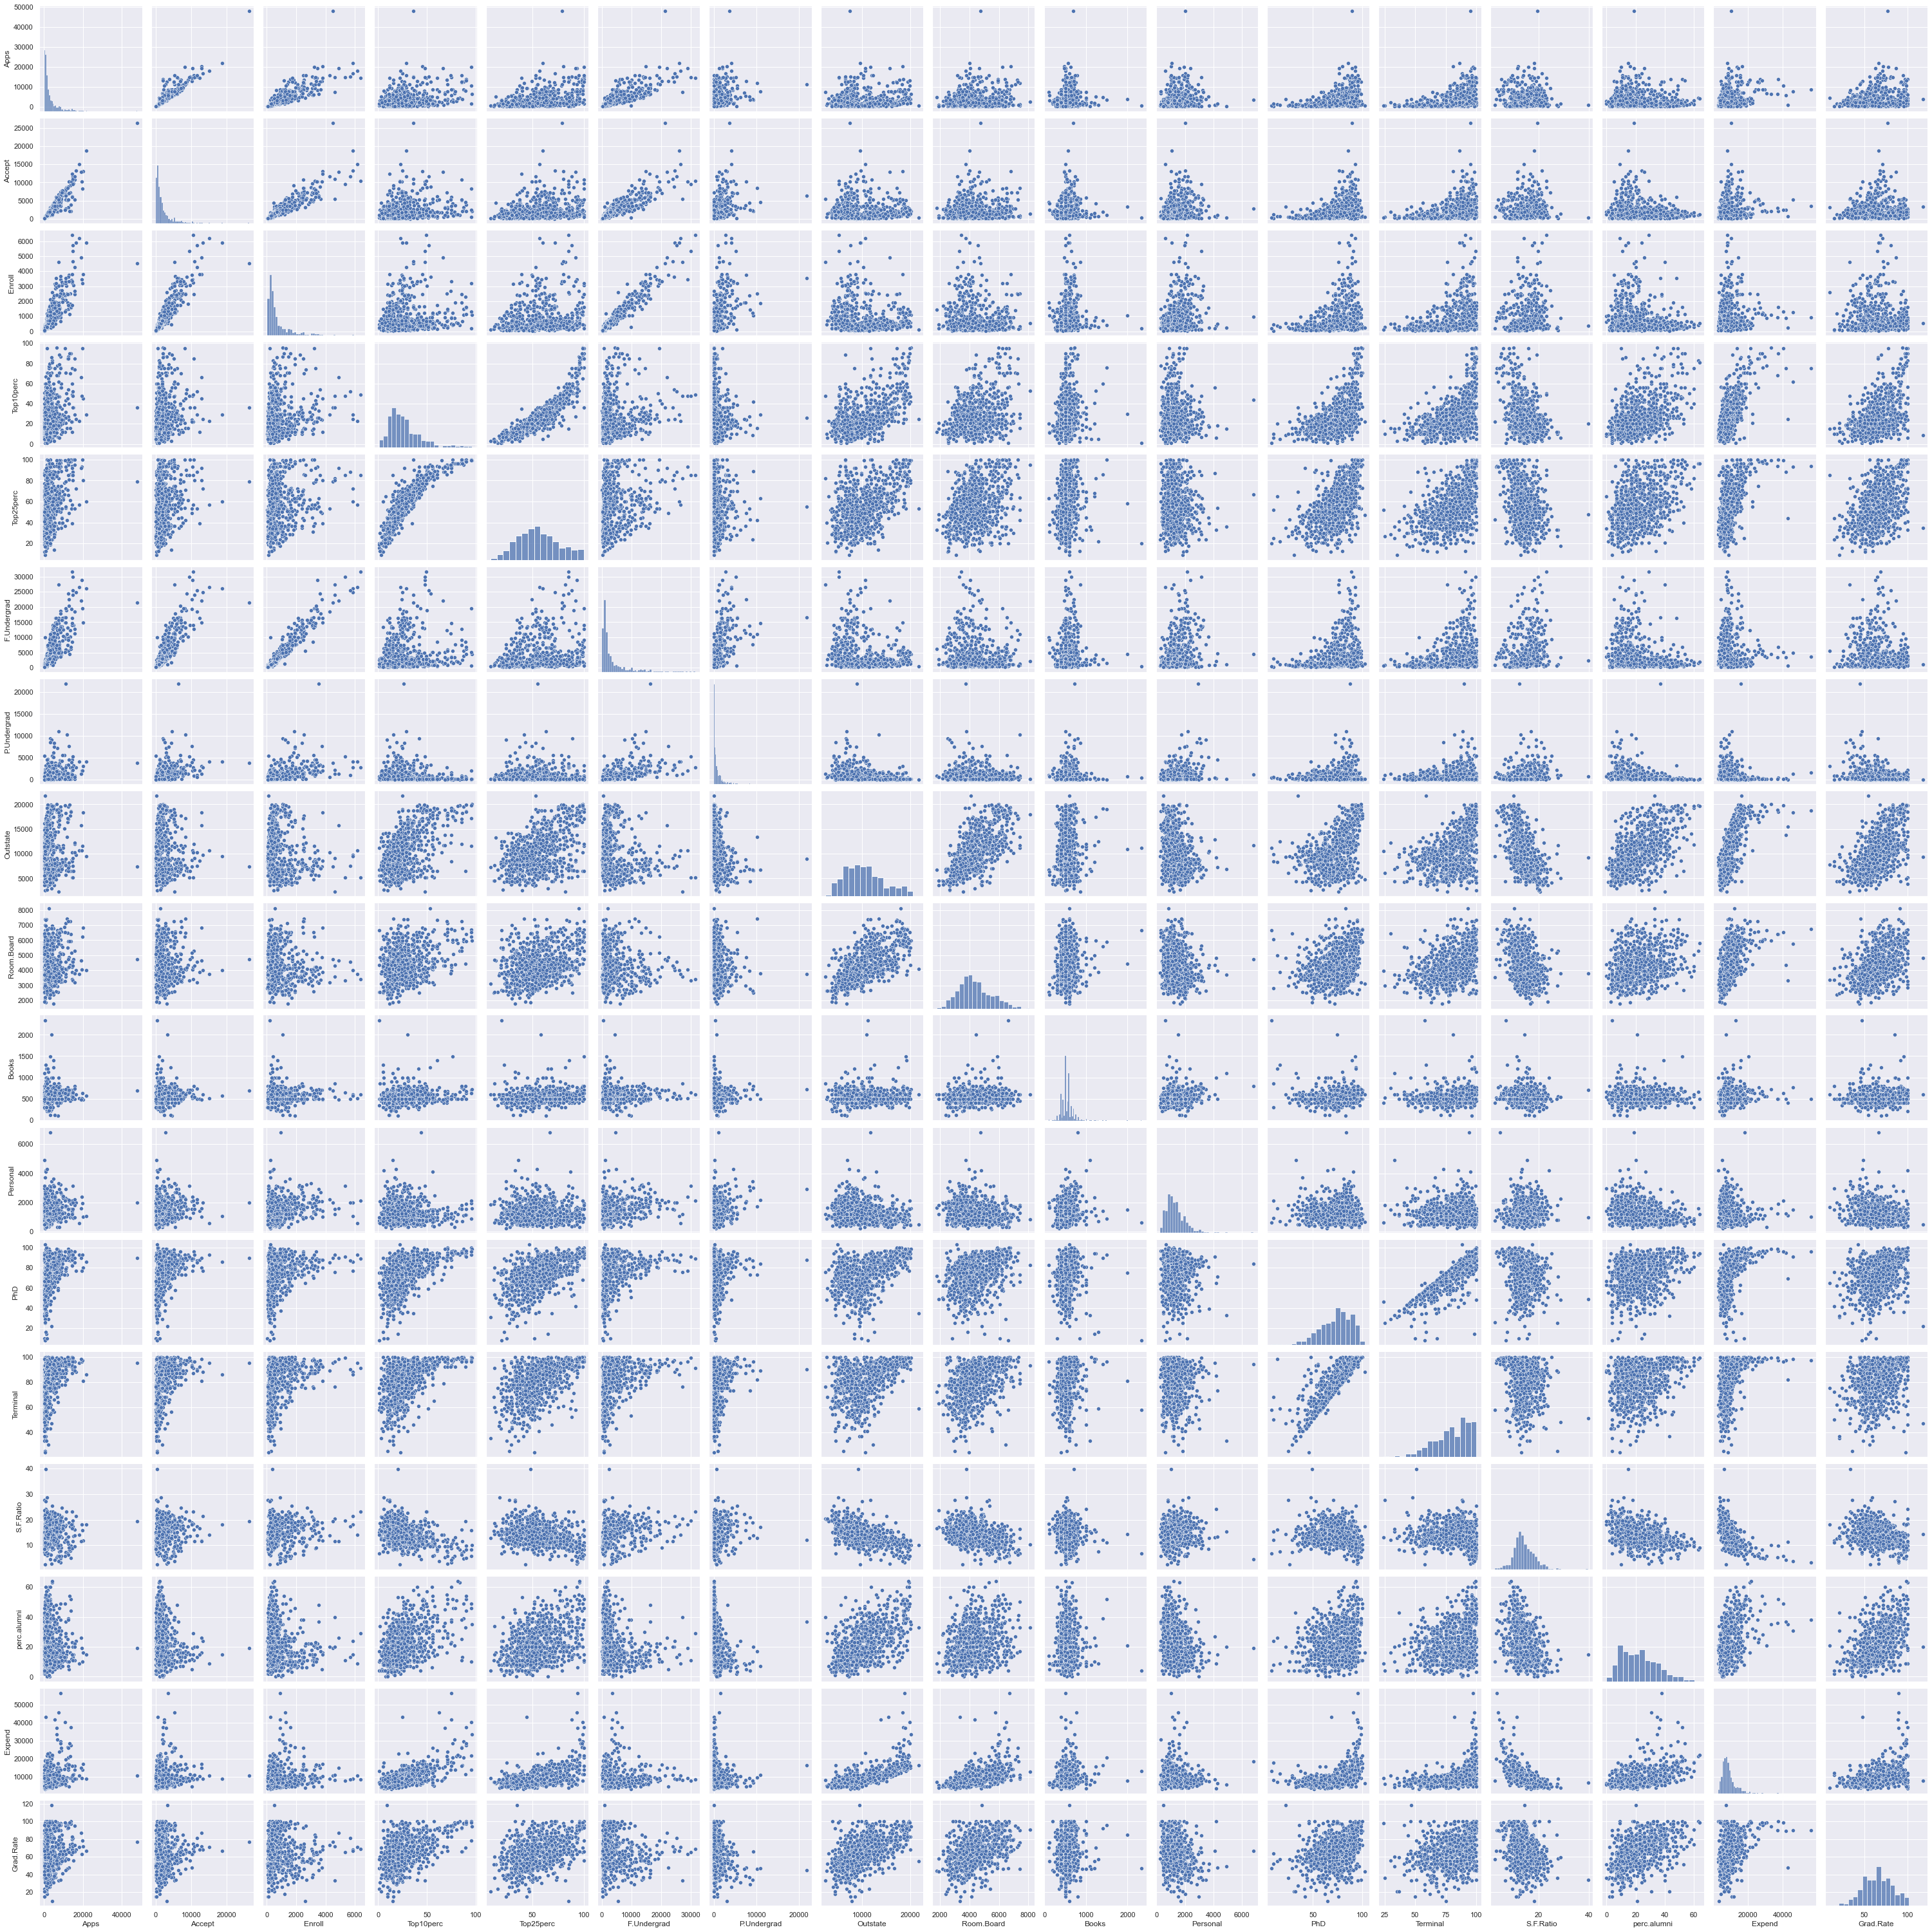

In [118]:
sns.pairplot(df_1_num)


#### Conclusion:

Pairplot shows the relationship between the variables in the form of scatterplot and the distribution of the variable in the form of histogram.

From the graph, we can see that there is positive linear relationship between variables like F.Undergrad and Enroll & Apps and Accept.

#### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

#### Solution:

In [119]:
df_1_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

Yes, scaling is necessary for PCA in this case because as we saw in the dataset their are many feature have very high value as compared to other feature so we need to sacle the data before proceed for PCA.

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

Feature scaling is essential for machine learning algorithms that calculate distances between data. . Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.



#### Data Scaling

In [120]:
from scipy.stats import zscore
df_scaled=df_1_num.apply(zscore)

In [121]:
df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [122]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


In [123]:
df_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

#### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

#### Solution:

#### Covariance Matrix:

In [124]:
cov_matrix = np.cov(df_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

#### Correaltion Matrix

In [125]:
corr_matrix = df_scaled.corr()
corr_matrix.T

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

* Correlation refers to the scaled form of covariance. Covariance indicates the direction of the linear relationship between variables. Correlation on the other hand measures both the strength and direction of the linear relationship between two variables. Covariance is affected by the change in scale.

* Covariance value has no upper or lower limit and is sensitive to the scale of the variables. While correlation value is always between -1 and 1 and is insensitive to the scale of the variables.

* In simple words: Variance tells us how much a quantity varies w.r.t. its mean. ... Covariance tells us direction in which two quantities vary with each other. Correlation shows us both, the direction and magnitude of how two quantities vary with each other.

#### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

#### Checking Outlier before scaling the Data

In [ ]:
plt.figure(figsize= (12,18))
feature_list = df_1_num.columns
for i in range (len(feature_list)):
    plt.subplot(6,3 ,i+1)
    sns.boxplot(y= df_1_num[feature_list[i]],data=df_1_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

* Now we have check the outliers on the after scaling the data , as we know that before scaling the data we need clean the outliers.Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

#### Data Scaling

In [ ]:
from scipy.stats import zscore
df_scaled=df_1_num.apply(zscore)

In [ ]:
df_scaled.head()

In [ ]:
df_scaled.info()

####  Checking  the outliers  on  the scaled data.

In [ ]:
plt.figure(figsize= (12,18))
feature_list = df_scaled.columns
for i in range (len(feature_list)):
    plt.subplot(6,3 ,i+1)
    sns.boxplot(y= df_scaled[feature_list[i]],data=df_scaled)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()

#### Insights

* Before scaling the data we found that there are significance presence of outliers in all the variables except Top25perc(donot have outliers). 

* After sacling we found Top25perc donot have outliers and most of outliers will not effect the model anymore as they are small in number i.e. The scaling shrinks the range of the feature values as shown in the left of figure above.






#### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose()

#### Eigen Vectors

In [ ]:
pca.components_ 

* Eigenvectors are the directions along which a particular linear transformation acts by flipping, compressing or stretching.

#### Eigen Values

In [ ]:
pca.explained_variance_ 

* Eigenvalue can be referred to as the strength of the transformation in the direction of eigenvector or the factor by which the compression occurs.

#### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

#### Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.
H0: All variables in the data are uncorrelated Ha: At least one pair of variables in the data are correlated If the null hypothesis cannot be rejected, then PCA is not advisable.
If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.



In [ ]:

#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

#### KMO Test The Kaiser-Meyer-Olkin (KMO) 

KMO Test The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is. Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.




In [ ]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose()

In [ ]:
pca.components_ 

In [ ]:
pca.explained_variance_

#### Check the explained variance for each PC

In [ ]:
pca.explained_variance_ratio_

#### Dataframe containing the loadings or coefficients of all PCs

In [ ]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_scaled))
df_pca_loading

#### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

we need the original scaled features

In [ ]:
pc_comps=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']



In [ ]:
#Dataframe containing the loadings or coefficients of all PCs
df_pca_loading = pd.DataFrame(np.round(pca.components_,2),columns=df_scaled.columns,index=pc_comps)
df_pca_loading.iloc[0]


#### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [ ]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

#### Scree Plot

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

#### Conclusion: 

From the above scree plot & cumulative values of the eigenvalues array we conclude that 8 PCs explaining the 88 -90 % variance ,so we are  taking  8 PCs for our further analysis. 

In [ ]:
#Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose() # Component output

In [ ]:
df_pca.shape

In [ ]:
# Loading of each feature on the components
pca.components_

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_scaled))
df_pca_loading.shape

In [ ]:
df_pca_loading

#### Explaination

Furthermore, eigenvectors indicate the direction of the principal components, we can multiply the original data by the eigenvectors to re-orient our data into the new axis.

#### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

Let's identify which features have maximum loading across the components. We will first plot the component loading on a heatmap. For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box. Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [ ]:
df_pca = pd.DataFrame(df_pca,columns=['pc_Expend','pc_F.Undergrad','pc_Books','pc_Apps','pc_Room.Board','pc_S.F.Ratio','pc_Grad.Rate','pc_perc.alumni'])
df_pca.head()

#### Final dataset with 8 PCs which we use for our further analysis.

In [ ]:
df_new = pd.concat([df_1_cat, df_pca], axis=1)
df_new 

In [ ]:
df_new.shape

In [ ]:
df_new.info()

In [ ]:
df_new.describe()

In [ ]:
df_new.isnull().sum()

In [ ]:
df_new.duplicated().any().any()

#### Check for presence of correlations among teh PCs

In [ ]:
corr=df_new.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True,fmt='.2f');



#### Insights from Final Dataframe with PCs.


In [ ]:
df_new.head()

#### Which College/University has maximum / minimum number of application received from students ?

In [ ]:
df_new.groupby(["Names"])["pc_Apps"].sum().sort_values(ascending=True)

Insight:

* Rutgers at New Brunswick has maximum number of application received from students.
* Georgia State University has minimum number of application received from students.  

#### Which College/University has maximum / minimum number of full time undergraduate students ?

In [ ]:
df_new.groupby(["Names"])["pc_F.Undergrad"].sum().sort_values(ascending=True)

Insight:

* Rutgers at New Brunswick has maximum number of full time undergraduate students. 

* Harvey Mudd College has minimum number of full time undergraduate students. 

#### Which College/University has maximum / minimum   Graduation Rate?

In [ ]:
df_new.groupby(["Names"])["pc_Grad.Rate"].sum().sort_values(ascending=True)

Insight: 
    
* Lindenwood College has maximum Graduation Rate.

* Center for Creative Studies College has minimum Graduation Rate
    

#### Which College/University has maximum / minimum S.F.Ratio( Student/Faculty Ratio )?

In [ ]:
df_new.groupby(["Names"])["pc_S.F.Ratio"].sum().sort_values(ascending=True)

Insight:

* Bradley University has maximum S.F.Ratio( Student/Faculty Ratio ).

* University of Minnesota Twin Cities has minimum S.F.Ratio( Student/Faculty Ratio )
    

#### Which College/University has maximum / minimum cost for Room and Board ?

In [ ]:
df_new.groupby(["Names"])["pc_Room.Board"].sum().sort_values(ascending=True)

Insight:

* Northeastern University has maximum cost for Room and Board for students.
* Grove City College has minimum cost for Room and Board for students.

#### Which College/University has maximum / minimum estimated cost for books for students ?

In [ ]:
df_new.groupby(["Names"])["pc_Books"].sum().sort_values(ascending=True)

Insight:

* Center for Creative Studies has maximum estimated cost for books for students.
* Missouri Southern State College has minimum estimated cost for books for students.

#### Which College/University has maximum / minimum instructional expenditure per student ?

In [ ]:
df_new.groupby(["Names"])["pc_Expend"].sum().sort_values(ascending=True)

Insight:

* Johns Hopkins University has maximum instructional expenditure per student.
* Goldey Beacom College has minimum instructional expenditure per student.

#### Which College/University alumni donate the maximum & minimum  ?

In [ ]:
df_new.groupby(["Names"])["pc_perc.alumni"].sum().sort_values(ascending=True)

Insight:

* University of Minnesota Twin Cities alumni donates the maximum donation.
* Saint Louis University alumni donates the minimum donation.

#### Conclusion:

* We know that the principal components describe the amount of the total variance that can be explained by a single dimension of the data. As mentioned above, we have generated only 8 PCA dimensions. 

* With help of PCA we have been able to reduce 17 numeric features into 8 components which is able to explain 90% of variance in the data.

* With help of reduced components we have been able to observe some patterns. Using some rules around business context we are able to extract the infomation from the final data.

* Using the components additional rules can be derived and analyzed.

* Thus, as far as business implication of using PCA is concerned, in this case, we are reducing a high- dimensional space (with 17 variables) and converting it to a lower dimensional space without (theoretically) losing much of the explanatory power.

* Unsupervised learning like clustering can further be applied on the data to segment the college based on the components created and further analyzed.

                                The End !